<a href="https://colab.research.google.com/github/Sreerag-Pillai/Data_Science/blob/main/Predicting_Student_Course_Grades_Regression_and_Classification_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Student Course Grades: Regression and Classification Approaches

### Content



*   Importing necessary libraries: NumPy, pandas, SciPy, Matplotlib, and seaborn.

* Loading the Data: The data is loaded from an Excel file into a pandas DataFrame.

* Data Preprocessing: The data is checked for null values, duplicates and data types.

* Feature Scaling: The 'Preliminary Score' and 'CourseGrade' columns are normalized to a range of 0 to 1 using MinMaxScaler module in scickit learn.

* Experiment 1 - Regression: A Linear Regression model is trained and validated using cross-validation. The model's performance is evaluated using Mean Squared Error (MSE) and R².

* Experiment 2 - Multi-class Classification: The 'CourseGrade' is converted to categorical variables (A, B, C, D, F). A Decision Tree Classifier is trained and tested. The model's performance is evaluated using accuracy, confusion matrix, and F1 score.

* Experiment 3 - Binary Classification: The 'CourseGrade' is further simplified to binary categories (Pass, Fail). A Decision Tree Classifier is trained and tested. The model's performance is evaluated using accuracy, confusion matrix, and F1 score.

* Discussion and Conclusion: The notebook concludes with a discussion comparing the three experiments and a conclusion summarizing the experiments and results
  



In [ ]:
# Importing necessary libraries and modules for analysis

import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Loading the data

In [ ]:
# Loading the data
score_df = pd.read_excel("/content/drive/MyDrive/Data mining UHCL SU23/Assignment 2 data/PreliminaryScoreResults.xlsx", header= [0])

#Displaying the data
score_df.head()

,StudentID,Preliminary Score,CourseGrade
0,1003261,26,2.67
1,1013794,28,2.67
2,1017414,29,4.00
3,1025667,22,3.67
4,1074837,26,4.00


### Step 2: Pre-processing the data

In [ ]:
#Checking for null vlaues
print(f'The coloumns with number of null values\n{score_df.isnull().sum()}')

#Checking for duplicates in studentID
duplicates = score_df.duplicated(subset='StudentID')
print(f'\nThe number of coloumns with duplicate values: {duplicates.sum()}')

The coloumns with number of null values
StudentID            0
Preliminary Score    0
CourseGrade          0
dtype: int64

The number of coloumns with duplicate values: 0


In [ ]:
# Printing and verifying data types of dataframe
score_df.dtypes

StudentID              int64
Preliminary Score      int64
CourseGrade          float64
dtype: object

Feature Scaling: Normalizing the data to standard range 0  to 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# normalizing data to 0 and 1 using minmaxscaler module
scaler = MinMaxScaler()

score_df[['prelim_score_normal', 'course_grade_normal']] = scaler.fit_transform(score_df[['Preliminary Score', 'CourseGrade']])

score_df.head()


,StudentID,Preliminary Score,CourseGrade,prelim_score_normal,course_grade_normal
0,1003261,26,2.67,0.85,0.6675
1,1013794,28,2.67,0.95,0.6675
2,1017414,29,4.00,1.00,1.0000
3,1025667,22,3.67,0.65,0.9175
4,1074837,26,4.00,0.85,1.0000


In [ ]:
# filtering normalized columns from the dataframe for modeling
model_df = score_df[['prelim_score_normal', 'course_grade_normal']]
model_df.head()

,prelim_score_normal,course_grade_normal
0,0.85,0.6675
1,0.95,0.6675
2,1.00,1.0000
3,0.65,0.9175
4,0.85,1.0000


Splitting the data into training (60%), cross-validation (20%), and testing (20%)

In [ ]:
#importing necessary modules
from sklearn.model_selection import train_test_split

# Splitting the data into training (60%) and the rest (40%)
df_train, df_rest = train_test_split(model_df, test_size=0.4, random_state=42)

# Splitting the rest into validation (50% of the rest, which is 20% of the total) and testing (the remaining 20%)
df_val, df_test = train_test_split(df_rest, test_size=0.5, random_state=42)

# Experiment 1

The objective of this experiment is to find how well the preliminary score can predict the final course grade. Since,  the final course grade in the data is a continuous value (ranging from 0 to 4), treating this as a regression problem in Experiment 1 seems appropriate to predict the exact final course grade as a continuous value based on the preliminary score

Step 1: Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into features (x) and target (y) for each set
x_train = df_train[['prelim_score_normal']]
y_train = df_train['course_grade_normal']

x_val = df_val[['prelim_score_normal']]
y_val = df_val['course_grade_normal']

x_test = df_test[['prelim_score_normal']]
y_test = df_test['course_grade_normal']

# Assigning the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

Step 3: Testing and evaluating the model

In [ ]:
# Make predictions on the testing data
y_test_pred = model.predict(x_test)

# Evaluating the model on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse_test}")

# calculating r2
r2_test = r2_score(y_test, y_test_pred)

print(f"Test R Squared Error: {r2_test}")

Test Mean Squared Error: 0.06862914852920993
Test R Squared Error: 0.21226623461136263


After following proper preprocessing, testing and training, the model's MSE of 0.0686 being low is good and indicates that on average the model's predictions are somewhat close to the actual values. However, R² of 1 indicates a perfect fit, so R² of 0.212 is somewhat low and suggests that the model may not be capturing a lot of the variance in the data.

# Experiment 2
The objective of this experiment is to find how well the preliminary score can predict the final course grade after converting the final course grade to categorical variables A,B,C,D. Since the target variable is categorical it could be considered as a classification-type problem.


### Step 1 : Preprocessing the dataframe

In [ ]:
# Defining the thresholds for letter grades
thresholds = [0, 1, 1.5, 2.5, 3.5, 4.5]  # Including an additional threshold value to match the number of letter grades
letter_grades = ['F', 'D', 'C', 'B', 'A']

# Create a new column 'letter_grade' using pd.cut
score_df['letter_grade'] = pd.cut(score_df['CourseGrade'], bins=thresholds, labels=letter_grades, right=False)

# Dropping the normalized coloumns
columns_to_drop = ['prelim_score_normal',	'course_grade_normal']
score_df = score_df.drop(columns_to_drop, axis=1)
# Displaying the dataframe to verify the changes
print(score_df)


    StudentID  Preliminary Score  CourseGrade letter_grade
0     1003261                 26         2.67            B
1     1013794                 28         2.67            B
2     1017414                 29         4.00            A
3     1025667                 22         3.67            A
4     1074837                 26         4.00            A
..        ...                ...          ...          ...
58    1927306                 27         4.00            A
59    1945122                 27         2.00            C
60    1969949                 22         4.00            A
61    1977001                 19         2.33            C
62    1977115                 17         2.00            C

[63 rows x 4 columns]


In [ ]:
#checking for null values
print(f'coloumns with null values: \n{score_df.isnull().sum()}')

coloumns with null values: 
StudentID            0
Preliminary Score    0
CourseGrade          0
letter_grade         0
dtype: int64


### Step 2: Splitting the dataset to trianing (80%) and test (20%)



---



In [ ]:
# Separate the independent variable (x) and the target variable (y)
x = score_df[['Preliminary Score']]
y = score_df['letter_grade']

# Splitting the data into training 80% and testing 20% sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Step 3: Trianing and testing the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize the decision tree classifier
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(x_test)

### Step 4: Evaluating the model

In [ ]:
from sklearn.metrics import accuracy_score

# calculating the accuracy of the model
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ac}")

Accuracy: 0.46153846153846156


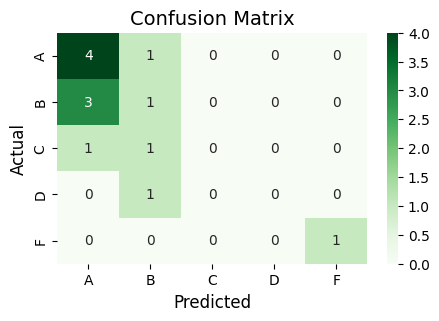

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluating and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Setting the figure size
plt.figure(figsize=(5, 3))

# Creating a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
# Setting labels, title, and ticks
tick_labels = ['A', 'B', 'C', 'D', 'F']  # Order of the letter grades
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Setting custom tick labels for x-axis and y-axis
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=tick_labels, fontsize=10)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=tick_labels, fontsize=10)



# Showing the plot
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Calculating the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.3905325443786982


The accuracy of 0.4615 suggests that the model correctly predicted the letter grade for approximately 46.15% of the instances in the test set. A higher F1 score indicates better performance, with a perfect score of 1. Together the F1 score of 0.39 and accuracy of 0.4615 suggest that model is still not accurately predicting all the predictor variable.

#Experiment 3



### Step 1 : Preprocessing the dataframe

In [ ]:
# Defining the grade ranges and corresponding labels
grade_ranges = [-1, 2, 4.1]
completion_labels = ['fail', 'pass']

# Adding the "completion_rate" column using pd.cut
score_df['completion_status'] = pd.cut(score_df['CourseGrade'], bins=grade_ranges, labels=completion_labels, right=False)

# Print the updated DataFrame
print(score_df)


    StudentID  Preliminary Score  CourseGrade letter_grade completion_status
0     1003261                 26         2.67            B              pass
1     1013794                 28         2.67            B              pass
2     1017414                 29         4.00            A              pass
3     1025667                 22         3.67            A              pass
4     1074837                 26         4.00            A              pass
..        ...                ...          ...          ...               ...
58    1927306                 27         4.00            A              pass
59    1945122                 27         2.00            C              pass
60    1969949                 22         4.00            A              pass
61    1977001                 19         2.33            C              pass
62    1977115                 17         2.00            C              pass

[63 rows x 5 columns]


In [ ]:
#checking for null values
print(f'coloumns with null values: \n{score_df.isnull().sum()}')

coloumns with null values: 
StudentID            0
Preliminary Score    0
CourseGrade          0
letter_grade         0
completion_status    0
dtype: int64


### Step 2: Splitting the dataset to trianing (80%) and test (20%)



In [ ]:
# Separating the independent variable (x) and the target variable (y)
x = score_df[['Preliminary Score']]
y = score_df['completion_status']

# Splitting the data into training 80% and testing 20% sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Step 3: Training and testing the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize the decision tree classifier
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(x_test)

### Step 4: Evaluating the model

In [ ]:
from sklearn.metrics import accuracy_score

# calculating the accuracy of the model
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ac}")

Accuracy: 0.7692307692307693


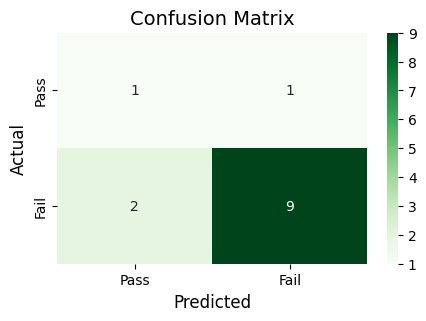

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluating and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Setting the figure size
plt.figure(figsize=(5, 3))

# Creating a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
# Setting labels, title, and ticks
tick_labels = ['Pass','Fail']  # Order of the letter grades
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Setting custom tick labels for x-axis and y-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels, fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels, fontsize=10)

plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Calculating the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.7868131868131869



The accuracy of 0.7692 indicates that the model correctly predicted the completion rate (pass/fail) for approximately 76.92% of the instances in the test set. The F1 score of 0.7868 suggests that the model's overall performance is good, as it considers both precision and recall.

## Conclusion



*   The three experiments are conducted to find if preliminary score can be a good predictor variable for course final Grade
*   In the first experiment, the problem was treated as a regression type problem which resulted in below expected performance. Hence, we can conclude from the first experiment that preliminary score could not predict the exact value for the final course grade.
*  The subsequent experiments, which treated the problem as a classification task, resulted in improved model performance, especially when the target variable was simplified to two categories (Pass, Fail).
* However, the improvement in performance came with cost of reduced details of class variable.
* In conclusion, these experiments demonstrate the potential of machine learning in educational settings, where it can aid in predicting student performance and getting help in a timely manner.

